In [1]:
import pandas as pd
# importing Pandas package to use dataframes
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
loans = pd.read_csv(r"C:\Users\Naga Charishma\OneDrive\Documents\nitt\ml\project 1\lending-club-loans.csv", low_memory=False)
#loading dataset from csv file

In [3]:
any(loans.duplicated())
#to check whether duplicate rows are present

True

In [4]:
loans.drop_duplicates(keep='first',inplace=True,ignore_index=True)
#dropping duplicates within the dataset

In [5]:
loans
#visualising updated dataset and it is observed that no.of rows got reduced from 42553 to 42538

C:\Users\Naga Charishma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Naga Charishma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loans.isnull().sum(axis = 1)  
# Returns the no. of NULL values in each Row

0         58
1         57
2         59
3         56
4         55
        ... 
42533     70
42534     71
42535     69
42536    114
42537    114
Length: 42538, dtype: int64

In [7]:
shape=loans.shape

In [8]:
row_thresh=0.25*shape[1] #setting threshold value to delete rows with morethan 75% null values
row_thresh

28.75

In [9]:
loans= loans.dropna(thresh=row_thresh,axis=0) # dropping rows with morethan 75% null values
loans #it is observed that 3 rows got deleted

C:\Users\Naga Charishma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Naga Charishma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,73096.0,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42532,72998,72992.0,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
col_thresh=0.5*shape[0] #setting threshold value to delete columns with morethan 50% null values
col_thresh

21269.0

In [11]:
loans= loans.dropna(thresh=col_thresh,axis=1) # dropping columns with morethan 50% null values
loans 

C:\Users\Naga Charishma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Naga Charishma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,73096.0,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,...,819.0,815.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42532,72998,72992.0,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,...,784.0,780.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,714.0,710.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,724.0,720.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN


In [12]:
loans

C:\Users\Naga Charishma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\Naga Charishma\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,73096.0,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,...,819.0,815.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42532,72998,72992.0,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,...,784.0,780.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,714.0,710.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,724.0,720.0,NaN,True,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN


In [13]:
for col in loans.columns:
  if(loans[col].isnull().sum()>0):
    loans[col].fillna(0, inplace=True) #replacing null values with zeroes

C:\Users\Naga Charishma\AppData\Local\Temp\ipykernel_19016\546984152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans[col].fillna(0, inplace=True) #replacing null values with zeroes


In [14]:
loans

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,73582,73096.0,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,...,819.0,815.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0
42532,72998,72992.0,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,...,784.0,780.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,714.0,710.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,724.0,720.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0


In [15]:
loans.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

C:\Users\Naga Charishma\AppData\Local\Temp\ipykernel_19016\969321352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation4 = loans.corr(method="spearman")


<Axes: >

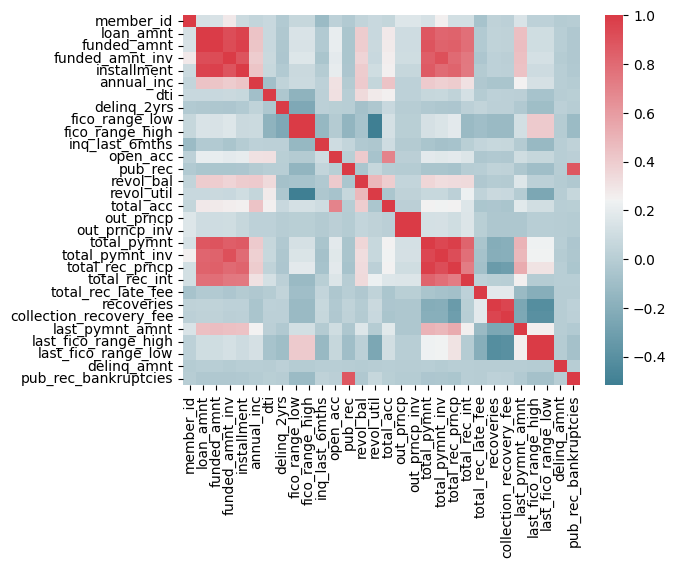

In [16]:
Correlation4 = loans.corr(method="spearman")
# Visualize the Spearman Correlation using HeatMap
sns.heatmap(Correlation4, cmap=sns.diverging_palette(220, 10, as_cmap=True),
xticklabels= Correlation4.columns.values, yticklabels= Correlation4.columns.values)
# It is observed that Last_fico_avg, term and grade are highly dependent on the target column.

In [17]:
drop_list=['url','desc','id','member_id','last_credit_pull_d','title','earliest_cr_line','addr_state','funded_amnt','funded_amnt_inv','int_rate','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','annual_inc','total_acc','total_pymnt_inv','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt']
loans = loans.drop(drop_list,axis=1) #dropping redundant columns

In [18]:
loans

,loan_amnt,term,installment,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,162.87,B,10+ years,RENT,Verified,Fully Paid,False,credit_card,...,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,2500.0,60 months,59.83,C,< 1 year,RENT,Source Verified,Charged Off,False,car,...,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,2400.0,36 months,84.33,C,10+ years,RENT,Not Verified,Fully Paid,False,small_business,...,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,10000.0,36 months,339.31,C,10+ years,RENT,Source Verified,Fully Paid,False,other,...,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,3000.0,60 months,67.79,B,1 year,RENT,Source Verified,Current,False,other,...,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,3500.0,36 months,113.39,C,< 1 year,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,False,other,...,819.0,815.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0
42532,1000.0,36 months,32.11,B,< 1 year,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,False,other,...,784.0,780.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0
42533,2525.0,36 months,80.69,B,< 1 year,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,False,other,...,714.0,710.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0
42534,6500.0,36 months,204.84,A,< 1 year,NONE,Not Verified,Does not meet the credit policy. Status:Fully ...,False,other,...,724.0,720.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0


In [19]:
loans["loan_status"].value_counts() #loan status as target feature

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [20]:
mapping_dict_1 = {"emp_length": {"10+ years": 10,"9 years": 9,"8 years": 8,"7 years": 7,"6 years": 6, "5 years": 5,"4 years": 4,"3 years": 3,"2 years": 2,"1 year": 1,"< 1 year": 0,"n/a": 0},"grade":{"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7}}
loans = loans.replace(mapping_dict_1)
loans['emp_length'] = loans.emp_length.astype('float')
loans
#categorical label encoding

,loan_amnt,term,installment,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,162.87,2,10.0,RENT,Verified,Fully Paid,False,credit_card,...,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,2500.0,60 months,59.83,3,0.0,RENT,Source Verified,Charged Off,False,car,...,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,2400.0,36 months,84.33,3,10.0,RENT,Not Verified,Fully Paid,False,small_business,...,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,10000.0,36 months,339.31,3,10.0,RENT,Source Verified,Fully Paid,False,other,...,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
4,3000.0,60 months,67.79,2,1.0,RENT,Source Verified,Current,False,other,...,694.0,690.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42531,3500.0,36 months,113.39,3,0.0,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,False,other,...,819.0,815.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0
42532,1000.0,36 months,32.11,2,0.0,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,False,other,...,784.0,780.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0
42533,2525.0,36 months,80.69,2,0.0,RENT,Not Verified,Does not meet the credit policy. Status:Fully ...,False,other,...,714.0,710.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0
42534,6500.0,36 months,204.84,1,0.0,NONE,Not Verified,Does not meet the credit policy. Status:Fully ...,False,other,...,724.0,720.0,0,True,INDIVIDUAL,0,0,0.0,0.0,0


In [21]:
loans = loans[(loans["loan_status"] == "Fully Paid") |
(loans["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans = loans.replace(mapping_dictionary)
loans
#categorical label encoding

,loan_amnt,term,installment,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,162.87,2,10.0,RENT,Verified,1,False,credit_card,...,744.0,740.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
1,2500.0,60 months,59.83,3,0.0,RENT,Source Verified,0,False,car,...,499.0,0.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
2,2400.0,36 months,84.33,3,10.0,RENT,Not Verified,1,False,small_business,...,719.0,715.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
3,10000.0,36 months,339.31,3,10.0,RENT,Source Verified,1,False,other,...,604.0,600.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
5,5000.0,36 months,156.46,1,3.0,RENT,Source Verified,1,False,wedding,...,679.0,675.0,False,True,INDIVIDUAL,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36 months,78.42,1,4.0,MORTGAGE,Not Verified,1,False,home_improvement,...,809.0,805.0,0,True,INDIVIDUAL,False,0,0.0,0.0,0
39782,8500.0,36 months,275.38,3,3.0,RENT,Not Verified,1,False,credit_card,...,639.0,635.0,0,True,INDIVIDUAL,False,0,0.0,0.0,0
39783,5000.0,36 months,156.84,1,0.0,MORTGAGE,Not Verified,1,False,debt_consolidation,...,744.0,740.0,0,True,INDIVIDUAL,False,0,0.0,0.0,0
39784,5000.0,36 months,155.38,1,0.0,MORTGAGE,Not Verified,1,False,other,...,814.0,810.0,0,True,INDIVIDUAL,False,0,0.0,0.0,0


In [22]:
for col in loans.columns:
    if (len(loans[col].unique()) < 2):
        print(col)
        loans = loans.drop(col,axis=1) #dropping coloumns with single unique value and the dropped coloumns are shown below
       

initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [23]:
loans['Fico_avg'] = loans[['fico_range_low', 'fico_range_high']].mean(1)
loans['last_fico_avg'] = loans[['last_fico_range_high', 'last_fico_range_low']].mean(1) 
#feature engineering:averaging fico ranges

In [24]:
loans['Fico_avg']

0        737.0
1        742.0
2        737.0
3        692.0
5        732.0
         ...  
39781    762.0
39782    692.0
39783    742.0
39784    812.0
39785    662.0
Name: Fico_avg, Length: 39239, dtype: float64

In [25]:
loans['last_fico_avg']


0        742.0
1        249.5
2        717.0
3        602.0
5        677.0
         ...  
39781    807.0
39782    637.0
39783    742.0
39784    812.0
39785    657.0
Name: last_fico_avg, Length: 39239, dtype: float64

In [26]:
drop_list_2=['fico_range_low', 'fico_range_high','last_fico_range_high', 'last_fico_range_low','Fico_avg']
loans = loans.drop(drop_list_2,axis=1)

In [27]:
loans.columns.to_list()


['loan_amnt',
 'term',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_pymnt',
 'total_rec_prncp',
 'recoveries',
 'pub_rec_bankruptcies',
 'last_fico_avg']

In [28]:
print (loans['pymnt_plan'].value_counts())
loans = loans.drop('pymnt_plan', axis=1)
#dropping pymnt_plan as it has only one true value

False    39238
True         1
Name: pymnt_plan, dtype: int64


In [29]:
loans['term'] = loans['term'].str.rstrip(' months').astype('float')
#stripping 'months' from term 

In [30]:
loans

,loan_amnt,term,installment,grade,emp_length,home_ownership,verification_status,loan_status,purpose,dti,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,total_rec_prncp,recoveries,pub_rec_bankruptcies,last_fico_avg
0,5000.0,36.0,162.87,2,10.0,RENT,Verified,1,credit_card,27.65,...,1.0,3.0,0.0,13648.0,0.837,5863.155187,5000.00,0.00,0.0,742.0
1,2500.0,60.0,59.83,3,0.0,RENT,Source Verified,0,car,1.00,...,5.0,3.0,0.0,1687.0,0.094,1008.710000,456.46,117.08,0.0,249.5
2,2400.0,36.0,84.33,3,10.0,RENT,Not Verified,1,small_business,8.72,...,2.0,2.0,0.0,2956.0,0.985,3005.666844,2400.00,0.00,0.0,717.0
3,10000.0,36.0,339.31,3,10.0,RENT,Source Verified,1,other,20.00,...,1.0,10.0,0.0,5598.0,0.210,12231.890000,10000.00,0.00,0.0,602.0
5,5000.0,36.0,156.46,1,3.0,RENT,Source Verified,1,wedding,11.20,...,3.0,9.0,0.0,7963.0,0.283,5632.210000,5000.00,0.00,0.0,677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36.0,78.42,1,4.0,MORTGAGE,Not Verified,1,home_improvement,11.33,...,0.0,13.0,0.0,7274.0,0.131,2822.969293,2500.00,0.00,0.0,807.0
39782,8500.0,36.0,275.38,3,3.0,RENT,Not Verified,1,credit_card,6.40,...,1.0,6.0,0.0,8847.0,0.269,9913.491822,8500.00,0.00,0.0,637.0
39783,5000.0,36.0,156.84,1,0.0,MORTGAGE,Not Verified,1,debt_consolidation,2.30,...,0.0,11.0,0.0,9698.0,0.194,5272.161128,5000.00,0.00,0.0,742.0
39784,5000.0,36.0,155.38,1,0.0,MORTGAGE,Not Verified,1,other,3.72,...,0.0,17.0,0.0,85607.0,0.007,5174.198551,5000.00,0.00,0.0,812.0


In [31]:
mapping_dict_2 = {"home_ownership": {"RENT":1 ,"MORTGAGE": 2,"OWN": 3,"OTHER": 4,"NONE": 5}}
loans = loans.replace(mapping_dict_2)
loans['home_ownership'] = loans.emp_length.astype('int')
#categorical label encoding

In [32]:
mapping_dict_3 = {"verification_status": {"Not Verified":1 ,"Verified": 2,"Source Verified": 3}}
loans = loans.replace(mapping_dict_3)
loans['verification_status'] = loans.emp_length.astype('int')
#categorical label encoding

In [33]:
# Import LabelEncoder Library
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Apply Label Encoding in purpose
le.fit(loans['purpose'].values)
loans['purpose'] = le.transform(loans['purpose'])
loans['purpose'].value_counts()


2     18370
1      5076
9      3937
4      2949
6      2184
11     1796
0      1536
13      941
7       690
8       582
12      378
5       372
3       325
10      103
Name: purpose, dtype: int64

In [34]:
loans

,loan_amnt,term,installment,grade,emp_length,home_ownership,verification_status,loan_status,purpose,dti,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,total_rec_prncp,recoveries,pub_rec_bankruptcies,last_fico_avg
0,5000.0,36.0,162.87,2,10.0,10,10,1,1,27.65,...,1.0,3.0,0.0,13648.0,0.837,5863.155187,5000.00,0.00,0.0,742.0
1,2500.0,60.0,59.83,3,0.0,0,0,0,0,1.00,...,5.0,3.0,0.0,1687.0,0.094,1008.710000,456.46,117.08,0.0,249.5
2,2400.0,36.0,84.33,3,10.0,10,10,1,11,8.72,...,2.0,2.0,0.0,2956.0,0.985,3005.666844,2400.00,0.00,0.0,717.0
3,10000.0,36.0,339.31,3,10.0,10,10,1,9,20.00,...,1.0,10.0,0.0,5598.0,0.210,12231.890000,10000.00,0.00,0.0,602.0
5,5000.0,36.0,156.46,1,3.0,3,3,1,13,11.20,...,3.0,9.0,0.0,7963.0,0.283,5632.210000,5000.00,0.00,0.0,677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,2500.0,36.0,78.42,1,4.0,4,4,1,4,11.33,...,0.0,13.0,0.0,7274.0,0.131,2822.969293,2500.00,0.00,0.0,807.0
39782,8500.0,36.0,275.38,3,3.0,3,3,1,1,6.40,...,1.0,6.0,0.0,8847.0,0.269,9913.491822,8500.00,0.00,0.0,637.0
39783,5000.0,36.0,156.84,1,0.0,0,0,1,2,2.30,...,0.0,11.0,0.0,9698.0,0.194,5272.161128,5000.00,0.00,0.0,742.0
39784,5000.0,36.0,155.38,1,0.0,0,0,1,9,3.72,...,0.0,17.0,0.0,85607.0,0.007,5174.198551,5000.00,0.00,0.0,812.0


In [35]:
from sklearn.preprocessing import StandardScaler
# Select the columns in your dataset for feature scaling
cols = ['loan_amnt', 'installment','dti','revol_bal']
# Apply z-score normalization to the selected numerical columns
scaler=StandardScaler()
loans[cols] = scaler.fit_transform(loans[cols])

In [36]:
loans

,loan_amnt,term,installment,grade,emp_length,home_ownership,verification_status,loan_status,purpose,dti,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,total_rec_prncp,recoveries,pub_rec_bankruptcies,last_fico_avg
0,-0.829226,36.0,-0.769466,2,10.0,10,10,1,1,2.150224,...,1.0,3.0,0.0,0.020071,0.837,5863.155187,5000.00,0.00,0.0,742.0
1,-1.167148,60.0,-1.263755,3,0.0,0,0,0,0,-1.841375,...,5.0,3.0,0.0,-0.733301,0.094,1008.710000,456.46,117.08,0.0,249.5
2,-1.180665,36.0,-1.146227,3,10.0,10,10,1,11,-0.685085,...,2.0,2.0,0.0,-0.653372,0.985,3005.666844,2400.00,0.00,0.0,717.0
3,-0.153380,36.0,0.076928,3,10.0,10,10,1,9,1.004418,...,1.0,10.0,0.0,-0.486964,0.210,12231.890000,10000.00,0.00,0.0,602.0
5,-0.829226,36.0,-0.800215,1,3.0,3,3,1,13,-0.313634,...,3.0,9.0,0.0,-0.338003,0.283,5632.210000,5000.00,0.00,0.0,677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,-1.167148,36.0,-1.174578,1,4.0,4,4,1,4,-0.294163,...,0.0,13.0,0.0,-0.381400,0.131,2822.969293,2500.00,0.00,0.0,807.0
39782,-0.356134,36.0,-0.229748,3,3.0,3,3,1,1,-1.032571,...,1.0,6.0,0.0,-0.282323,0.269,9913.491822,8500.00,0.00,0.0,637.0
39783,-0.829226,36.0,-0.798392,1,0.0,0,0,1,2,-1.646663,...,0.0,11.0,0.0,-0.228723,0.194,5272.161128,5000.00,0.00,0.0,742.0
39784,-0.829226,36.0,-0.805396,1,0.0,0,0,1,9,-1.433978,...,0.0,17.0,0.0,4.552462,0.007,5174.198551,5000.00,0.00,0.0,812.0


<Axes: >

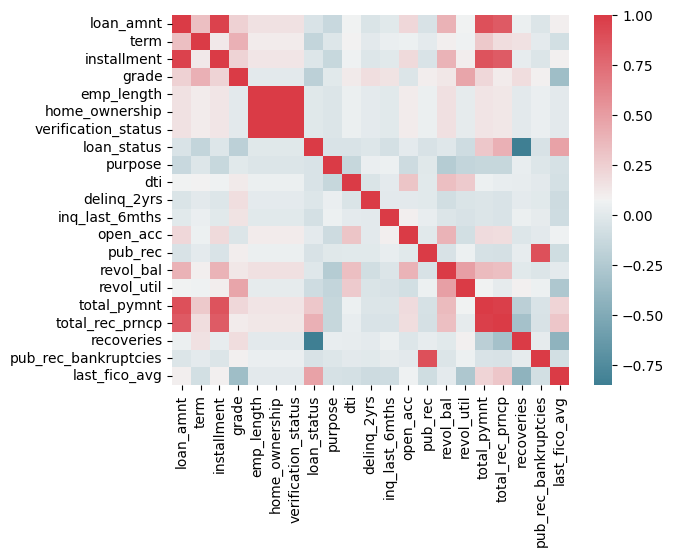

In [37]:
Correlation2 = loans.corr(method="spearman")
# Visualize the Spearman Correlation using HeatMap
sns.heatmap(Correlation2, cmap=sns.diverging_palette(220, 10, as_cmap=True),
xticklabels= Correlation2.columns.values, yticklabels= Correlation2.columns.values)
# It is observed that Last_fico_avg, term and grade are highly dependent on the target column.

In [38]:
loans.describe()[['loan_amnt']]




,loan_amnt
count,3.923900e+04
mean,-4.635667e-17
std,1.000013e+00
min,-1.437486e+00
25%,-7.751580e-01
50%,-1.533804e-01
75%,5.224648e-01
max,3.225846e+00


In [39]:
#handling outliers
q1= loans['loan_amnt'].quantile(0.25)
q3 = loans['loan_amnt'].quantile(0.75)
iqr= q3-q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr
outliers_low =loans[loans['loan_amnt']<lower_lim]
outliers_high = loans[loans['loan_amnt']>upper_lim]
print(lower_lim)
print(upper_lim)
print(outliers_high)

-2.721592168884488
2.468899021508479
       loan_amnt  term  installment  grade  emp_length  home_ownership  \
31      2.796684  36.0     3.226248      1         5.0               5   
80      3.225846  60.0     1.096448      4         3.0               3   
128     3.225846  36.0     3.780548      1         6.0               6   
185     3.225846  36.0     3.918224      2         2.0               2   
209     2.482416  60.0     2.222174      5         6.0               6   
...          ...   ...          ...    ...         ...             ...   
19864   2.820339  60.0     2.589150      7         5.0               5   
19875   2.820339  60.0     2.494072      6         8.0               8   
19889   2.550000  60.0     1.979587      5         6.0               6   
19902   2.550000  60.0     2.094285      5        10.0              10   
19921   3.225846  60.0     2.942453      7         2.0               2   

       verification_status  loan_status  purpose       dti  ...  \
31     

In [40]:
loans_processed=loans[((loans['loan_amnt']>lower_lim) & (loans['loan_amnt']<upper_lim ))]
#Now we remove outliers from the dataframe so that it becomes efficient
loans_processed

,loan_amnt,term,installment,grade,emp_length,home_ownership,verification_status,loan_status,purpose,dti,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_pymnt,total_rec_prncp,recoveries,pub_rec_bankruptcies,last_fico_avg
0,-0.829226,36.0,-0.769466,2,10.0,10,10,1,1,2.150224,...,1.0,3.0,0.0,0.020071,0.837,5863.155187,5000.00,0.00,0.0,742.0
1,-1.167148,60.0,-1.263755,3,0.0,0,0,0,0,-1.841375,...,5.0,3.0,0.0,-0.733301,0.094,1008.710000,456.46,117.08,0.0,249.5
2,-1.180665,36.0,-1.146227,3,10.0,10,10,1,11,-0.685085,...,2.0,2.0,0.0,-0.653372,0.985,3005.666844,2400.00,0.00,0.0,717.0
3,-0.153380,36.0,0.076928,3,10.0,10,10,1,9,1.004418,...,1.0,10.0,0.0,-0.486964,0.210,12231.890000,10000.00,0.00,0.0,602.0
5,-0.829226,36.0,-0.800215,1,3.0,3,3,1,13,-0.313634,...,3.0,9.0,0.0,-0.338003,0.283,5632.210000,5000.00,0.00,0.0,677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39781,-1.167148,36.0,-1.174578,1,4.0,4,4,1,4,-0.294163,...,0.0,13.0,0.0,-0.381400,0.131,2822.969293,2500.00,0.00,0.0,807.0
39782,-0.356134,36.0,-0.229748,3,3.0,3,3,1,1,-1.032571,...,1.0,6.0,0.0,-0.282323,0.269,9913.491822,8500.00,0.00,0.0,637.0
39783,-0.829226,36.0,-0.798392,1,0.0,0,0,1,2,-1.646663,...,0.0,11.0,0.0,-0.228723,0.194,5272.161128,5000.00,0.00,0.0,742.0
39784,-0.829226,36.0,-0.805396,1,0.0,0,0,1,9,-1.433978,...,0.0,17.0,0.0,4.552462,0.007,5174.198551,5000.00,0.00,0.0,812.0


In [41]:
import sklearn

from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = loans_processed.drop('loan_status',axis = 1)
y = loans_processed['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X)
print(y)




       loan_amnt  term  installment  grade  emp_length  home_ownership  \
0      -0.829226  36.0    -0.769466      2        10.0              10   
1      -1.167148  60.0    -1.263755      3         0.0               0   
2      -1.180665  36.0    -1.146227      3        10.0              10   
3      -0.153380  36.0     0.076928      3        10.0              10   
5      -0.829226  36.0    -0.800215      1         3.0               3   
...          ...   ...          ...    ...         ...             ...   
39781  -1.167148  36.0    -1.174578      1         4.0               4   
39782  -0.356134  36.0    -0.229748      3         3.0               3   
39783  -0.829226  36.0    -0.798392      1         0.0               0   
39784  -0.829226  36.0    -0.805396      1         0.0               0   
39785  -0.491303  36.0    -0.325450      5         0.0               0   

       verification_status  purpose       dti  delinq_2yrs  inq_last_6mths  \
0                       10       

In [42]:
print(X_train)
print(X_test)

       loan_amnt  term  installment  grade  emp_length  home_ownership  \
37762   0.522465  36.0     0.813949      2         1.0               1   
23903  -0.964395  60.0    -1.095954      4         2.0               2   
10750   0.116958  60.0    -0.299449      2         2.0               2   
27795   1.874155  60.0     0.418479      3        10.0              10   
13941  -0.153380  36.0     0.042341      2         4.0               4   
...          ...   ...          ...    ...         ...             ...   
8909    0.116958  60.0    -0.089290      5        10.0              10   
34209  -0.829226  36.0    -0.752052      2         2.0               2   
5958    0.116958  60.0     0.050592      6         4.0               4   
13533  -0.558888  36.0    -0.313217      5         7.0               7   
34701   0.657634  36.0     1.030728      3         8.0               8   

       verification_status  purpose       dti  delinq_2yrs  inq_last_6mths  \
37762                    1       

In [43]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Naga Charishma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
prediction = logmodel.predict(X_test)

In [45]:
confusion_matrix(y_test, prediction)

array([[1401,  217],
       [  26, 9783]], dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9787345760042006

In [47]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train, y_train)
random_forest_predict = random_forest.predict(X_test)

In [48]:
confusion_matrix(y_test, random_forest_predict)

array([[1567,   51],
       [   6, 9803]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, random_forest_predict)

0.9950118141244421

<Axes: >

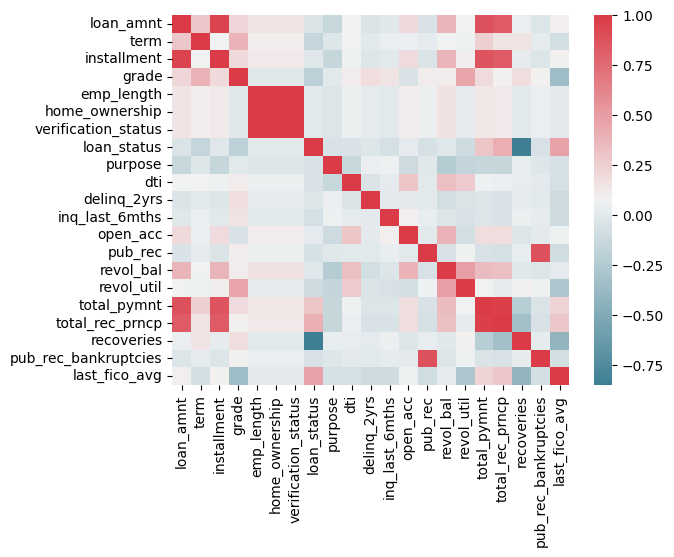

In [50]:
Correlation3 = loans_processed.corr(method="spearman")
# Visualize the Spearman Correlation using HeatMap
sns.heatmap(Correlation3, cmap=sns.diverging_palette(220, 10, as_cmap=True),
xticklabels= Correlation3.columns.values, yticklabels= Correlation3.columns.values)
# It is observed that Last_fico_avg, term and grade are highly dependent on the target column.